### HCC section 1

In [1]:
import sdevelo as sv
import scvelo as scv
import anndata
import numpy as np

adata = anndata.read_h5ad('data/HCC/HCC4_data.h5ad')
adata.uns['clusters_colors'] = ["#CB181D", "#EF3B2C", "#FB6A4A", "#FC9272", "#FCBBA1", "#1f77b4", "#A65628", "blue", "#00ee00"]
adata = adata[adata.obs['slice'] == 1]
sorted_codes_list = np.sort(adata.obs['clusters'].unique() - 1).tolist()
adata.uns['clusters_colors'] = [adata.uns['clusters_colors'][i] for i in sorted_codes_list]


(Working on SDEvelo)
2024-09-13 15:28:55


In [2]:
args = sv.Config()
args.vis_type_col = 'clusters'

model = sv.SDENN(args, adata)
adata = model.train(args.nEpochs)

cuda
Filtered out 731 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:07) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
2982
Epoch: 0, Loss: 2.181, alpha: 6.83, beta: 6.35, gamma: 0.01, s1: 0.014, s2: 0.010,  t_m: 0.207,  u_shift: 0.000,  s_shift: 0.014
Epoch: 50, Loss: 1.008, alpha: 5.50, beta: 22.29, gamma: 2.54, s1: 0.024, s2: 0.011,  t_m: 0.220,  u_shift: 0.000,  s_shift: -0.063
Epoch: 100, Loss: 0.955, alpha: 9.06, beta: 31.01, gamma: 2.75, s1: 0.113, s2: 0.010,  t_m: 0.134,  u_shift: 0.000,  s_shift: -0.063
Epoch: 150, Loss: 0.920, alpha: 12.38, beta: 35.09, gamma: 2.95, s1: 0.167, s2: 0.010,  t_m: 0.100,  u_shift: 0.000,  s_shift: -0.06

computing velocity graph (using 10/128 cores)


  0%|          | 0/2982 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'sde_velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'sde_velocity_length' (adata.obs)
--> added 'sde_velocity_confidence' (adata.obs)
--> added 'sde_velocity_confidence_transition' (adata.obs)
computing velocity embedding
    finished (0:00:00) --> added
    'sde_velocity_pca', embedded velocity vectors (adata.obsm)


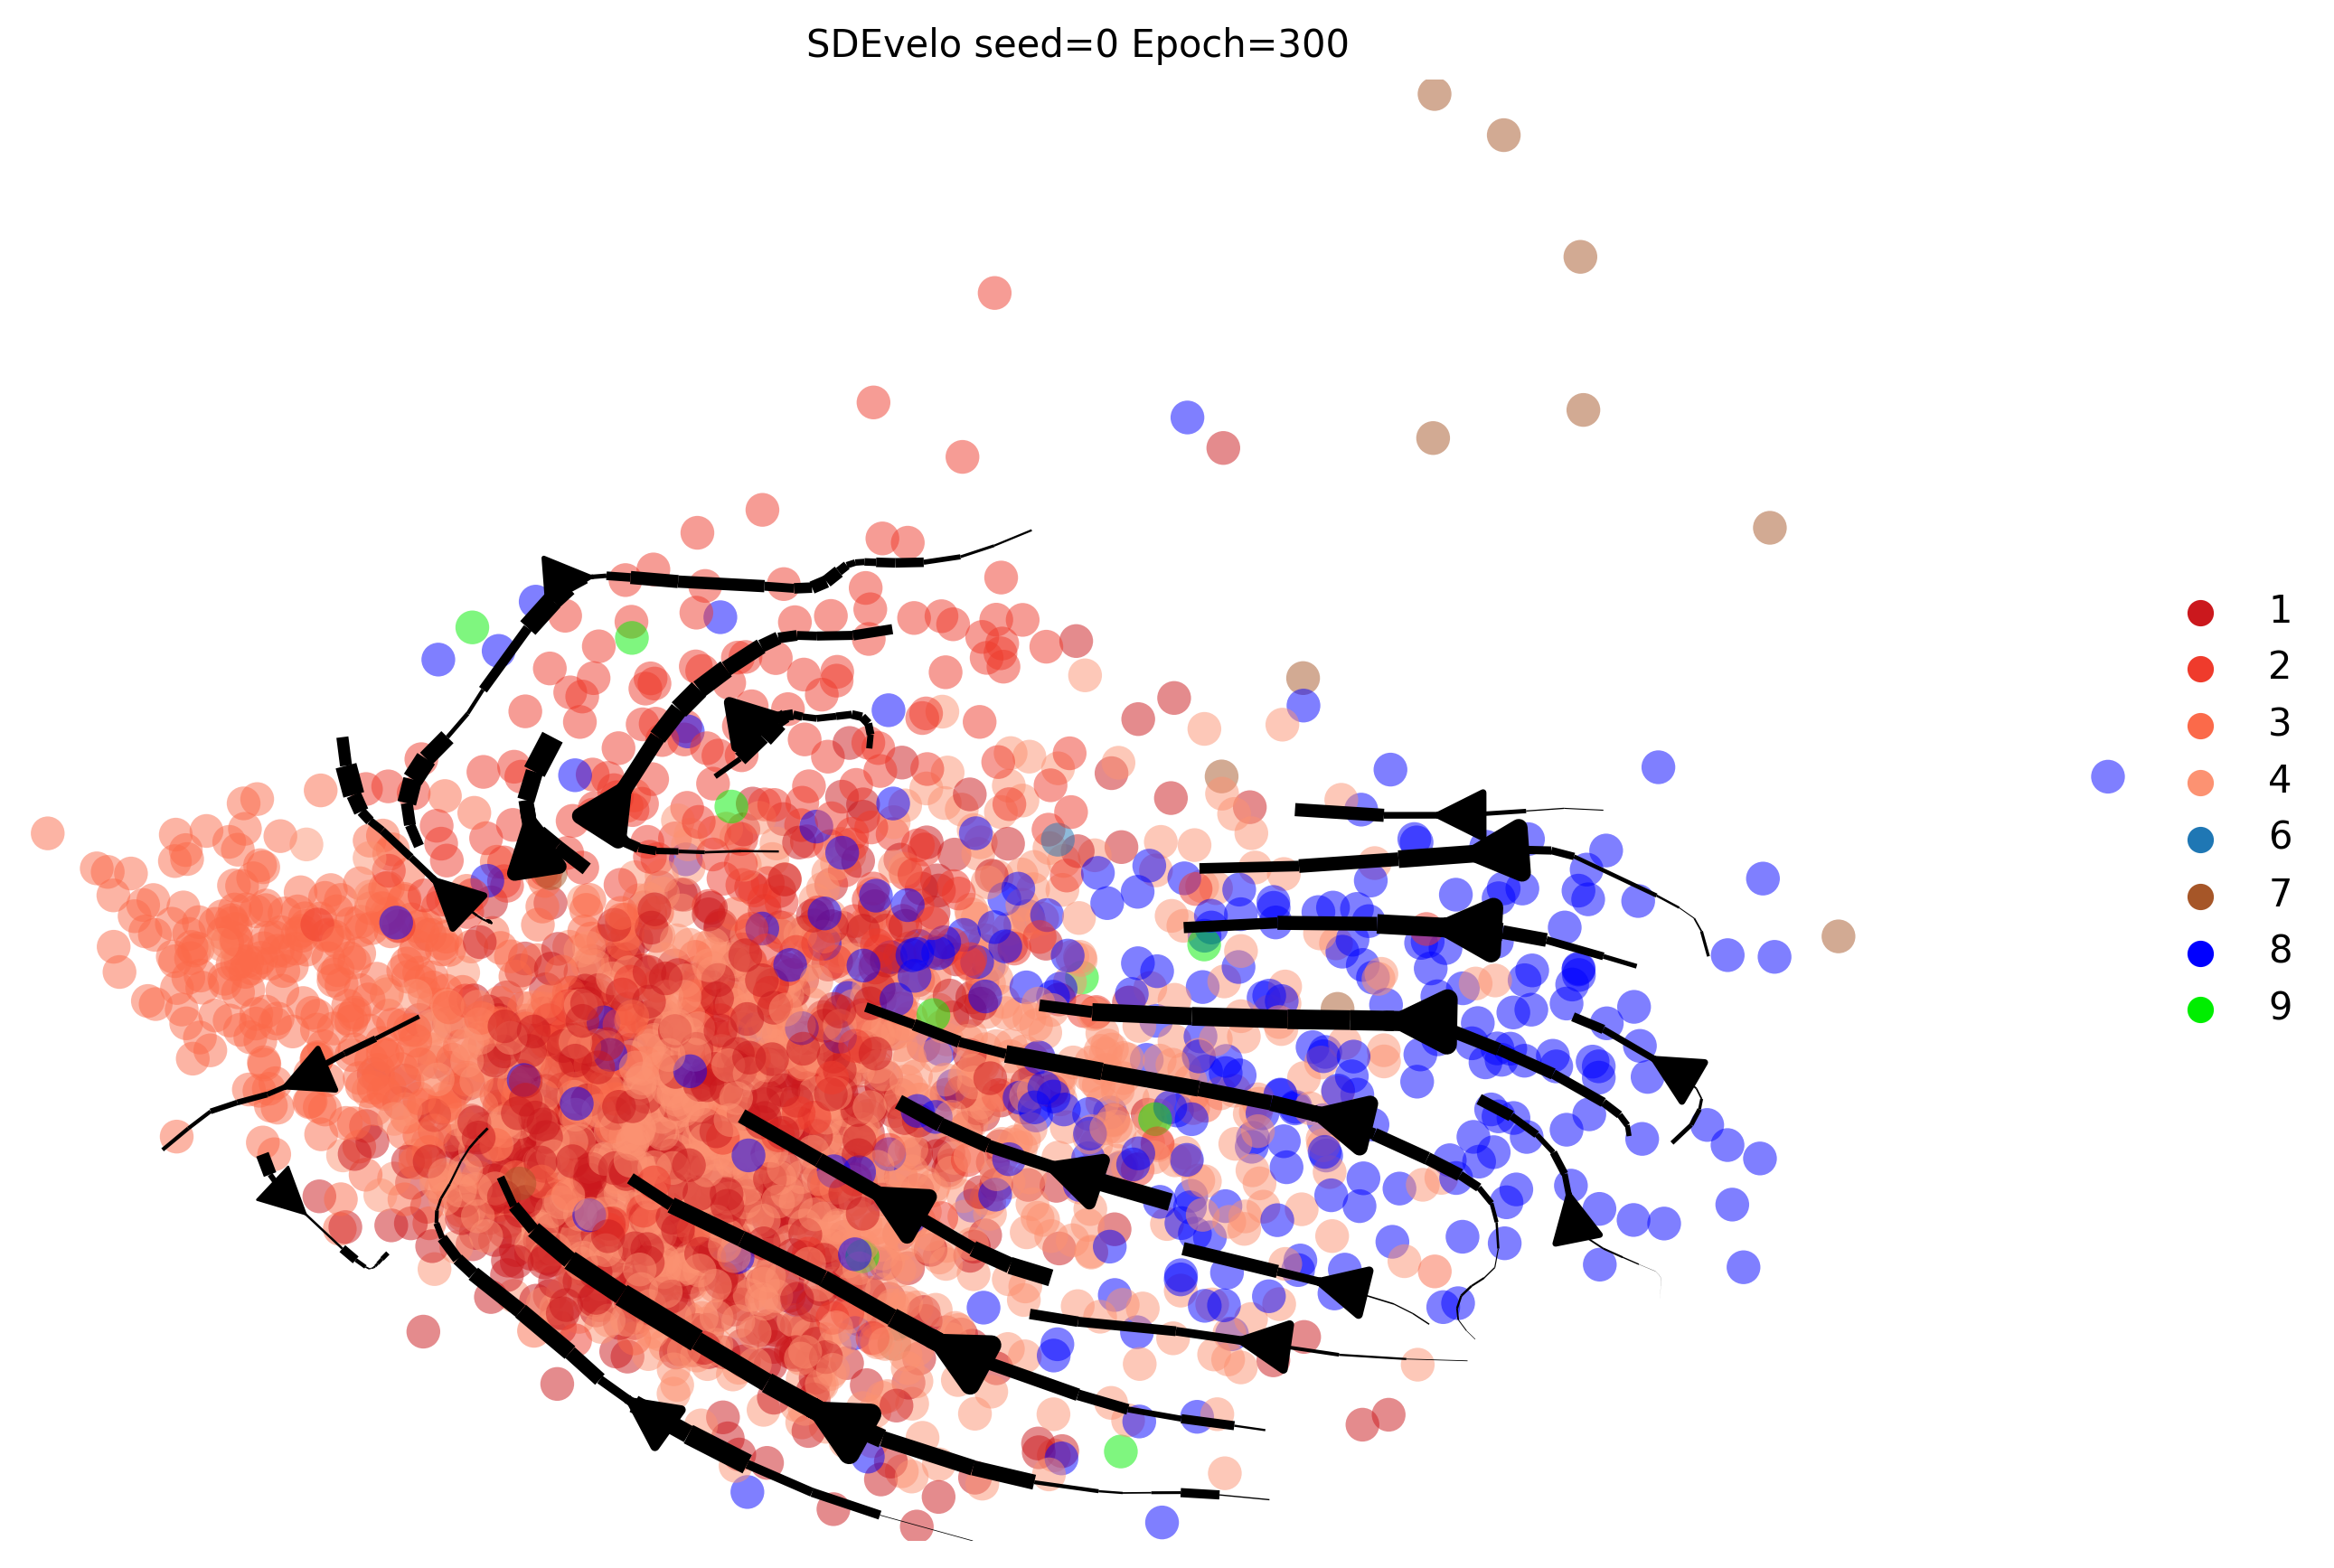

In [3]:
kwargs = dict(fontsize=10, density=0.7, arrow_size=3, linewidth=4,  alpha=0.5)
sv.plot_streamline(adata, args, **kwargs)

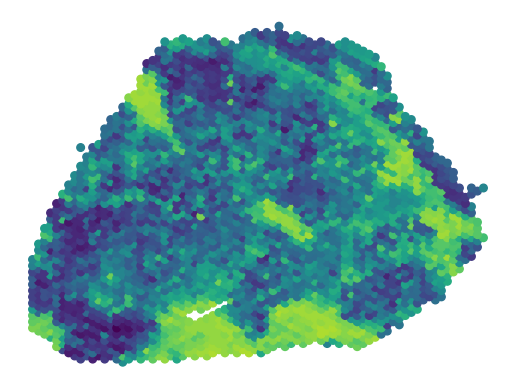

In [4]:
import matplotlib.pyplot as plt
plt.scatter(adata.obs['row'], adata.obs['col'], c=adata.obs['latent_time'], s=30, cmap='viridis_r', vmin=0, vmax=1)
plt.axis('off')
plt.show()